In [5]:
import matplotlib.pyplot as plt
import pandas as pd

In [6]:
import numpy as np
from scipy.signal import argrelextrema

In [7]:
df = pd.read_csv("myfile_new.csv")
df.head(10)

,Unnamed: 0,ASP_col
0,0,223.0
1,1,229.0
2,2,229.1
3,3,224.0
4,4,218.0
5,5,209.0
6,6,200.0
7,7,191.0
8,8,183.0
9,9,176.0


In [8]:
df = df.rename(columns={"Unnamed: 0": "Point"})
df.head(5)

,Point,ASP_col
0,0,223.0
1,1,229.0
2,2,229.1
3,3,224.0
4,4,218.0


(300.0, 790.0)

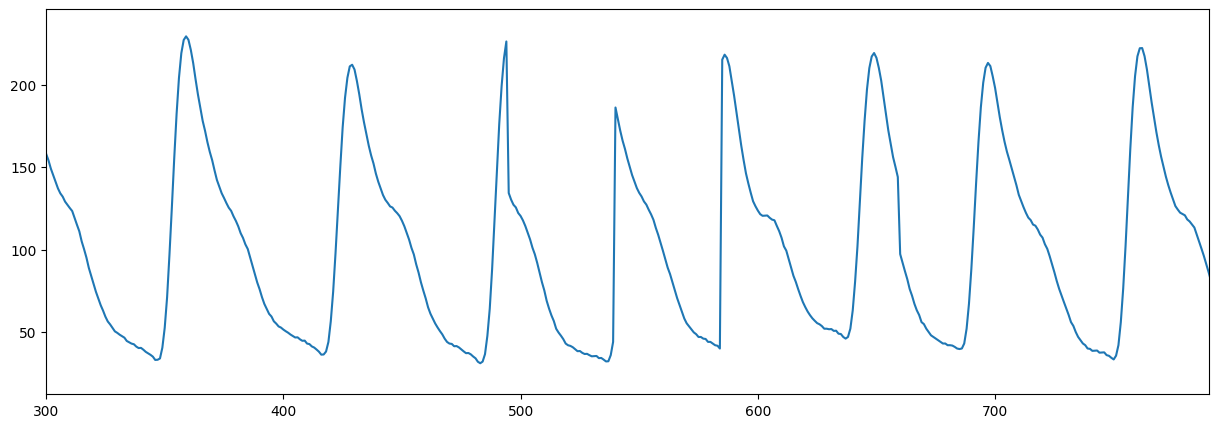

In [9]:
plt.figure(figsize=(15, 5))
plt.plot(df["Point"], df["ASP_col"])
plt.xlim(300, 790)

In [10]:
df["min"] = df.iloc[:, 1].rolling(window=3, center=True).min()
min_indices = argrelextrema(df["ASP_col"].values, np.less, order=10)[0]

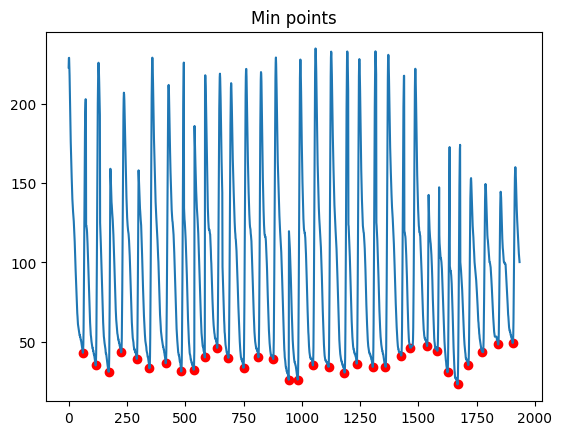

In [11]:
plt.plot(df["Point"], df["ASP_col"], label="ASP_col")
plt.scatter(
    df["Point"].iloc[min_indices],
    df["ASP_col"].iloc[min_indices],
    color="red",
    label="Минимумы",
)
plt.title("Min points")
plt.show()

In [12]:
min_df = pd.DataFrame(
    {"place_min": min_indices, "point_min": df["ASP_col"].iloc[min_indices].values}
)
print(min_df)

    place_min  point_min
0          61      43.00
1         116      35.00
2         171      31.00
3         225      43.30
4         292      39.20
5         346      33.20
6         416      36.40
7         483      31.20
8         536      32.30
9         584      40.10
10        637      46.12
11        685      39.80
12        750      33.50
13        814      40.14
14        877      39.10
15        944      26.00
16        982      26.10
17       1047      35.11
18       1115      34.10
19       1183      30.50
20       1235      36.21
21       1304      34.13
22       1359      34.15
23       1426      41.27
24       1465      46.26
25       1537      47.31
26       1581      44.26
27       1625      30.70
28       1668      23.00
29       1714      35.20
30       1775      43.40
31       1842      48.24
32       1904      49.23


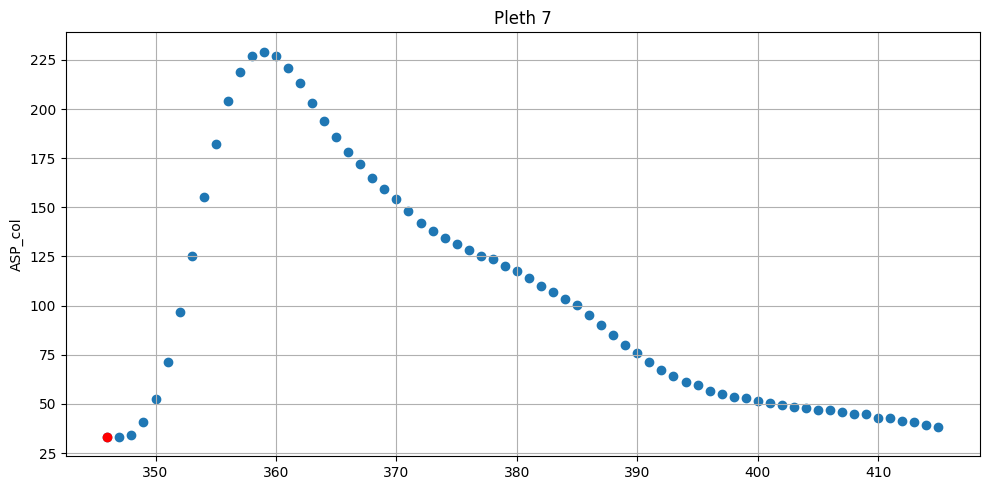

In [19]:
indices = np.concatenate(([0], min_indices, [len(df) - 1]))

num_plots = len(indices) - 1

pleth_nomber = 7 # select part of the plot to display

plt.figure(figsize=(10, 5))

start_index = indices[pleth_nomber - 1]
end_index = indices[pleth_nomber]

plt.scatter(
    df["Point"][start_index:end_index], df["ASP_col"][start_index:end_index]
)  # main plot
plt.scatter(
    min_indices[(min_indices >= start_index) & (min_indices < end_index)],
    df["ASP_col"].iloc[
        min_indices[(min_indices >= start_index) & (min_indices < end_index)]
    ],
    color="red",
)
plt.title(f"Pleth {pleth_nomber}")
plt.ylabel("ASP_col")
plt.grid("on")

plt.tight_layout()
plt.show()

In [14]:
df["Point"][start_index:end_index], df["ASP_col"][start_index:end_index].shape

(61      61
 62      62
 63      63
 64      64
 65      65
 66      66
 67      67
 68      68
 69      69
 70      70
 71      71
 72      72
 73      73
 74      74
 75      75
 76      76
 77      77
 78      78
 79      79
 80      80
 81      81
 82      82
 83      83
 84      84
 85      85
 86      86
 87      87
 88      88
 89      89
 90      90
 91      91
 92      92
 93      93
 94      94
 95      95
 96      96
 97      97
 98      98
 99      99
 100    100
 101    101
 102    102
 103    103
 104    104
 105    105
 106    106
 107    107
 108    108
 109    109
 110    110
 111    111
 112    112
 113    113
 114    114
 115    115
 Name: Point, dtype: int64,
 (55,))